In [48]:
import os, glob, time, pickle, random
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
from torch.utils.data import Dataset, ConcatDataset
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
import pickle
from matplotlib.colors import LogNorm, ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

class ParquetDataset(Dataset):
    def __init__(self, filename):
        self.parquet = pq.ParquetFile(filename)
        self.cols = None # read all columns
        
        self.cols = ['X_jet.list.item.list.item.list.item','am']
    def __getitem__(self, index):
        data = self.parquet.read_row_group(index, columns=self.cols).to_pydict()
        data['X_jet'] = np.float32(data['X_jet'][0])
        data['X_jet'][0] = data['X_jet'][0] #Track pT
        data['X_jet'][1] =  data['X_jet'][1] #Track dZ
        data['X_jet'][2] =  data['X_jet'][2] #Track d0
        data['X_jet'][3] =  data['X_jet'][3] #ECAL
        data['X_jet'][4] =  data['X_jet'][4] #HCAL
        data['am'] =  data['am']
        
        return dict(data)
    def __len__(self):
        return self.parquet.num_row_groups
X_CMSI  = ["TracksAtECAL_pt", "TracksAtECAL_dZSig", "TracksAtECAL_d0Sig", "ECAL_energy",
"HBHE_energy", "PixAtEcal_1", "PixAtEcal_2", "PixAtEcal_3", "PixAtEcal_4", "TibAtEcal_1", "TibAtEcal_2","TobAtEcal_1", "TobAtEcal_2",
"TibAtEcal_3", "TibAtEcal_4",  "TobAtEcal_3", "TobAtEcal_4", "TobAtEcal_5",
"TobAtEcal_6", "TidAtEcal_1", "TecAtEcal_1", "TecAtEcal_2", "TecAtEcal_3"]


In [49]:
decays = glob.glob('/pscratch/sd/b/bbbam/IMG_aToTauTau_Hadronic_tauDR0p4_m1p2To17p2_dataset_2_unbaised_v2_train/IMG_*m1p2To3p6*0000*')
print(decays)
dset_train = ConcatDataset([ParquetDataset(d) for d in decays])

['/pscratch/sd/b/bbbam/IMG_aToTauTau_Hadronic_tauDR0p4_m1p2To17p2_dataset_2_unbaised_v2_train/IMG_aToTauTau_Hadronic_tauDR0p4_m1p2To3p6_dataset_2_unbaised_unphysical_0000_train.parquet']


In [50]:
def plotJet_crop(img, mass):
#     out_dir='plot_for_prelim/Img_A_2Tau_unmerged_dR_1_1p5'
#     if not os.path.isdir(out_dir):
#         os.makedirs(out_dir)
    mins = [0.001]*13
    maxs =[]
    for i in range(13):
        maxs.append(img[i].max())
    fig, ax = plt.subplots(figsize=(12,12))
    if maxs[0]  > 0 : plt.imshow(img[0], cmap='Oranges', norm=LogNorm(vmin=mins[0], vmax=maxs[0]),  alpha=0.9)
    if maxs[1]  > 0 : plt.imshow(img[1], cmap='Blues',   norm=LogNorm(vmin=mins[1], vmax=maxs[1]),  alpha=0.9)
    if maxs[2]  > 0 : plt.imshow(img[2], cmap='Greys',   norm=LogNorm(vmin=mins[2], vmax=maxs[2]),  alpha=0.9)
    if maxs[3]  > 0 : plt.imshow(img[3], cmap='Greens',  norm=LogNorm(vmin=mins[3], vmax=maxs[3]),  alpha=0.9)       
    if maxs[4]  > 0 : plt.imshow(img[4], cmap='Blues',   norm=LogNorm(vmin=mins[4], vmax=maxs[4]),  alpha=0.4)   
    if maxs[5]  > 0 : plt.imshow(img[5], cmap='Purples', norm=LogNorm(vmin=mins[5], vmax=maxs[5]),  alpha=0.9)   
    if maxs[10] > 0 : plt.imshow(img[10], cmap='pink',  norm=LogNorm(vmin=mins[10],vmax=maxs[10]), alpha=0.9)
    hep.cms.label(llabel=f"Image event number mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
#     plt.title(f"Image event number {eve} ")
    plt.xlabel(r"$\mathrm{i\varphi}$") #28, 30
    plt.ylabel(r"$\mathrm{i\eta}$") #28, 30
    #LEGEND
    colors = {0:'orange',1:'blue',2:'grey',3:'green',4:'lightblue',5:'purple',6:'pink'}
    labels = {0:'Track pT',1:'dz_sig',2:'d0_sig',3:'ECAL',4:'HCAL',5:'BPix L1',6:'BStrip L1'}
    patches =[mpatches.Patch(color=colors[i],label=labels[i]) for i in colors]
    plt.legend(handles=patches, bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.,fontsize=10 )
#     plt.tight_layout()
#     plt.savefig(f'{out_dir}/{eve}_Cropped_Image_event_crop_{crop_position}.png',facecolor='w',dpi=300,)
    plt.show()

Image for single layer

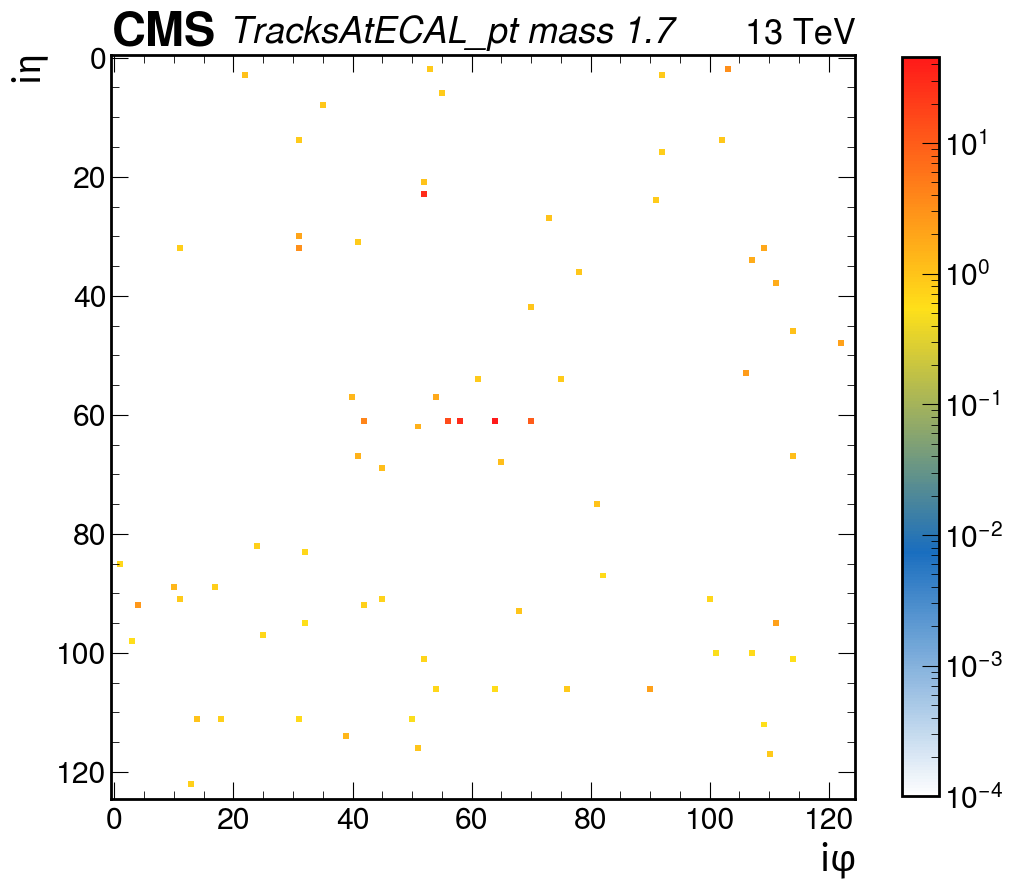

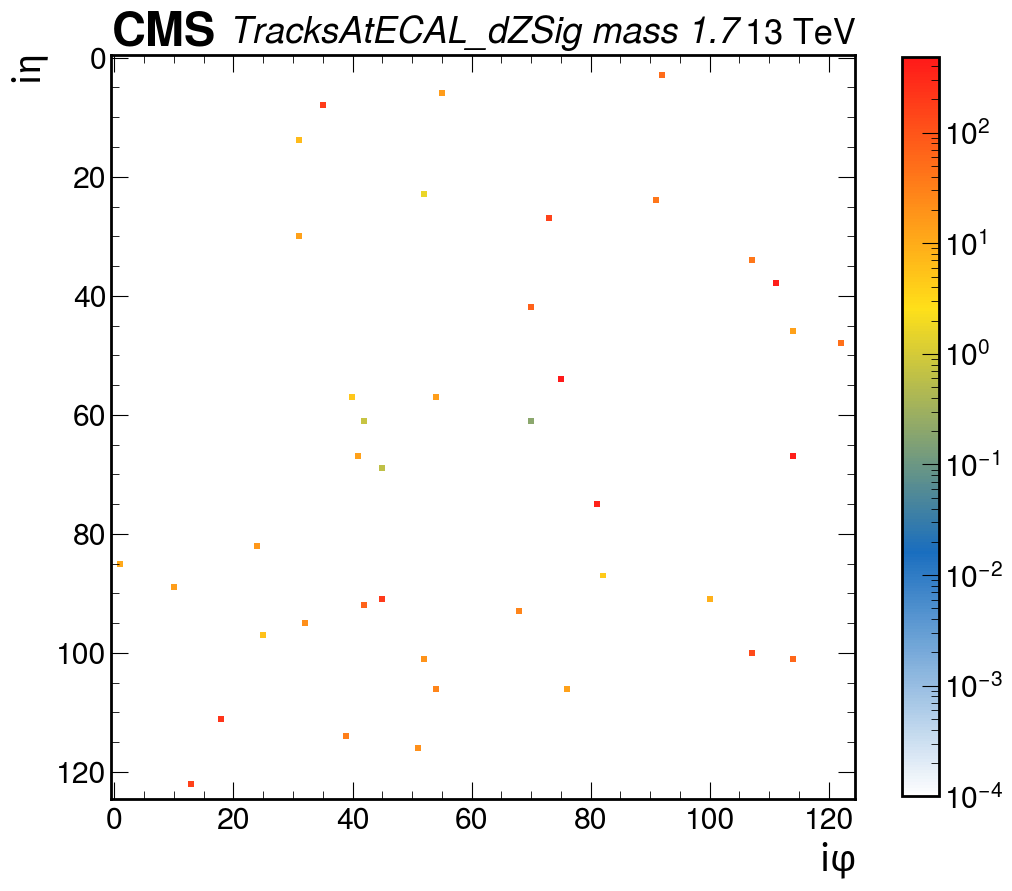

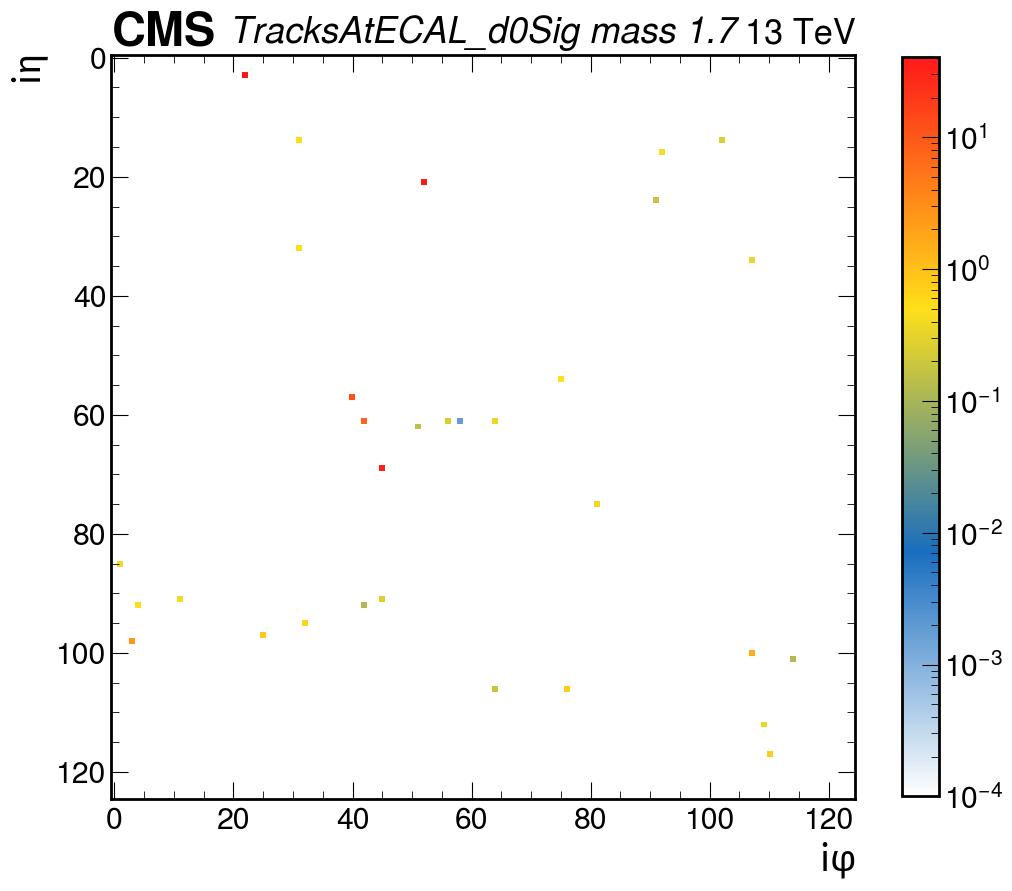

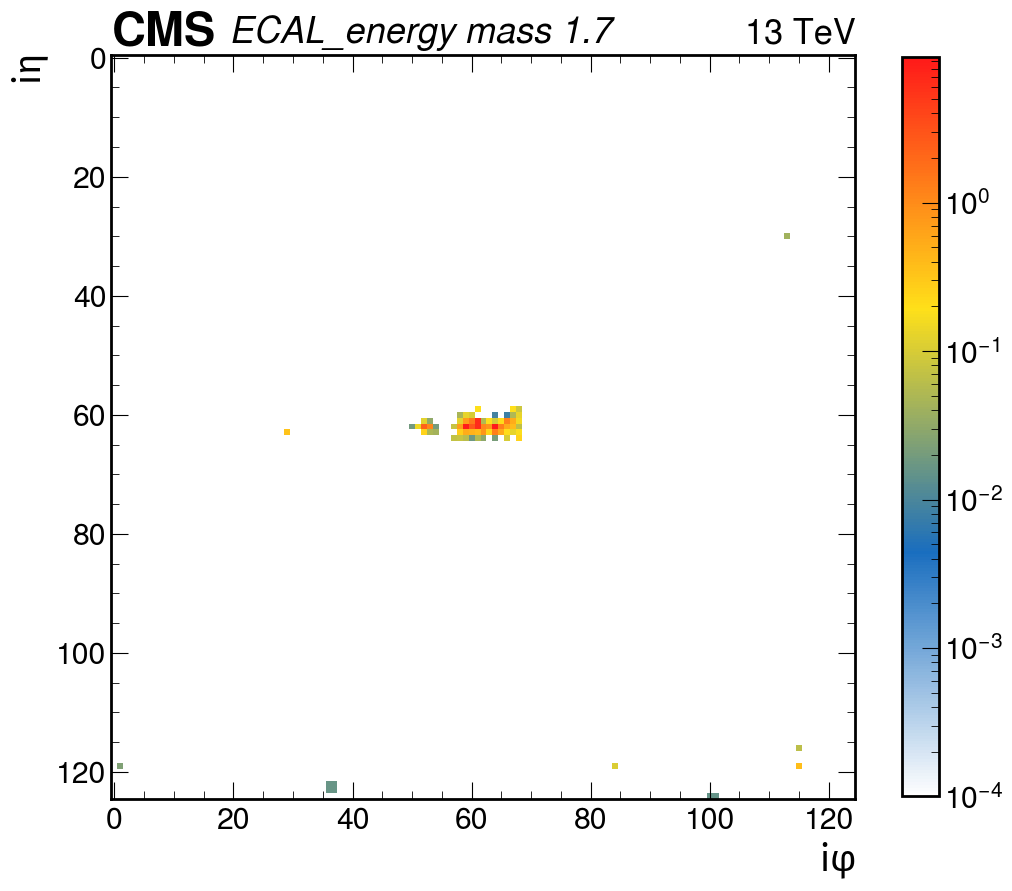

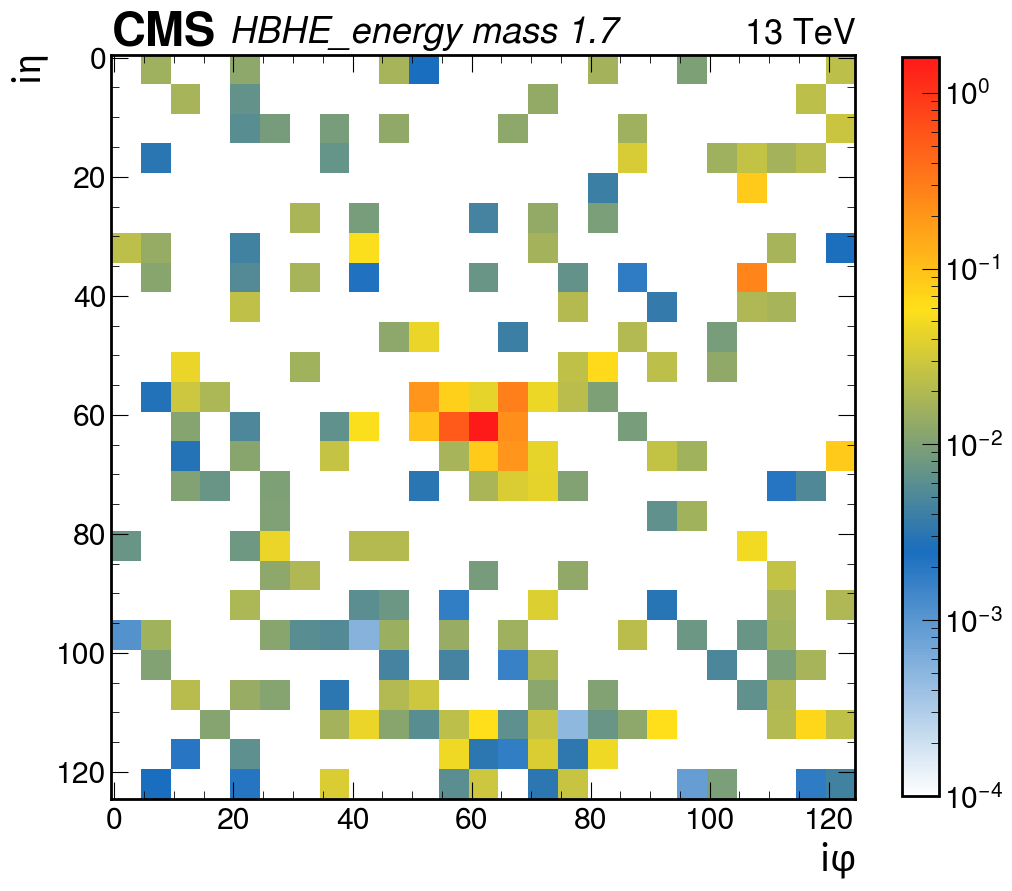

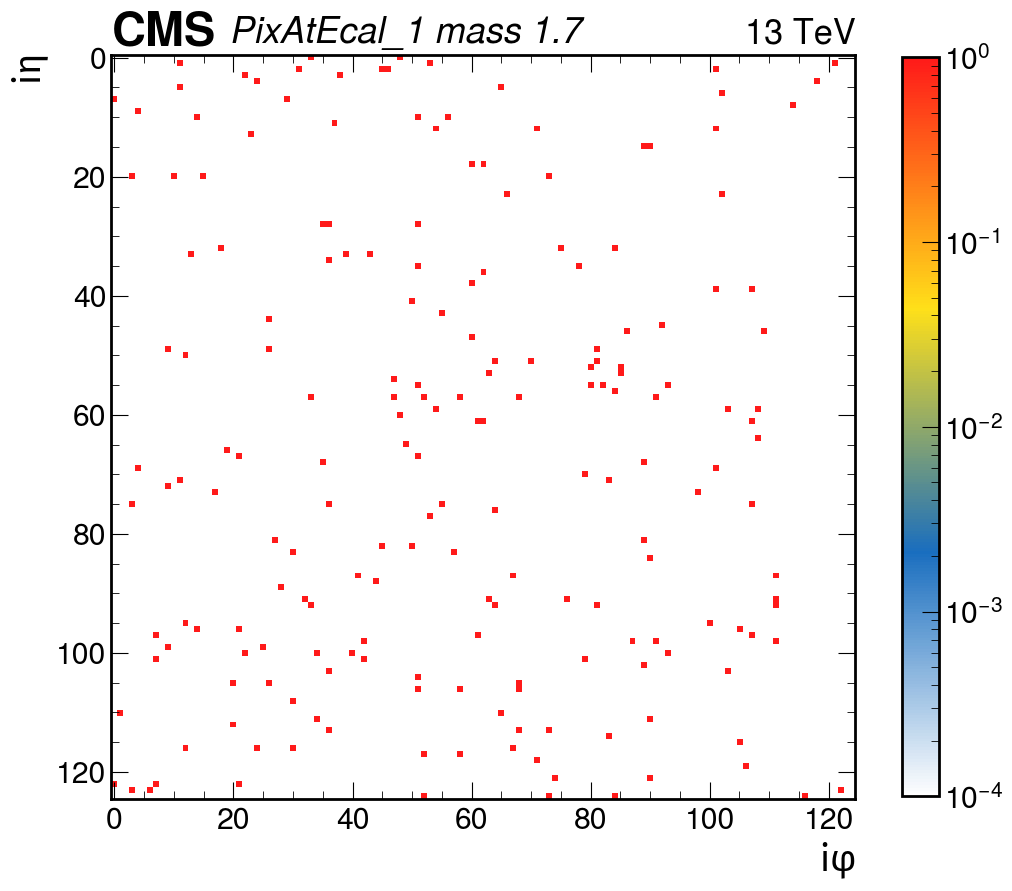

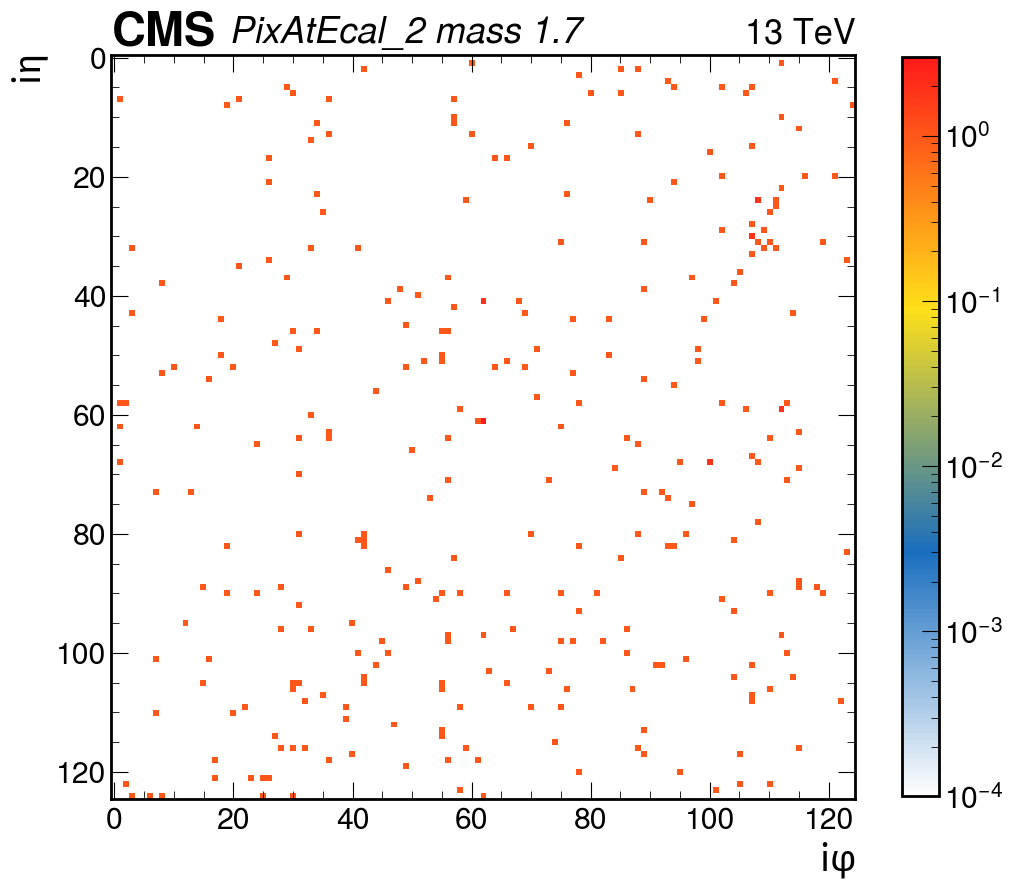

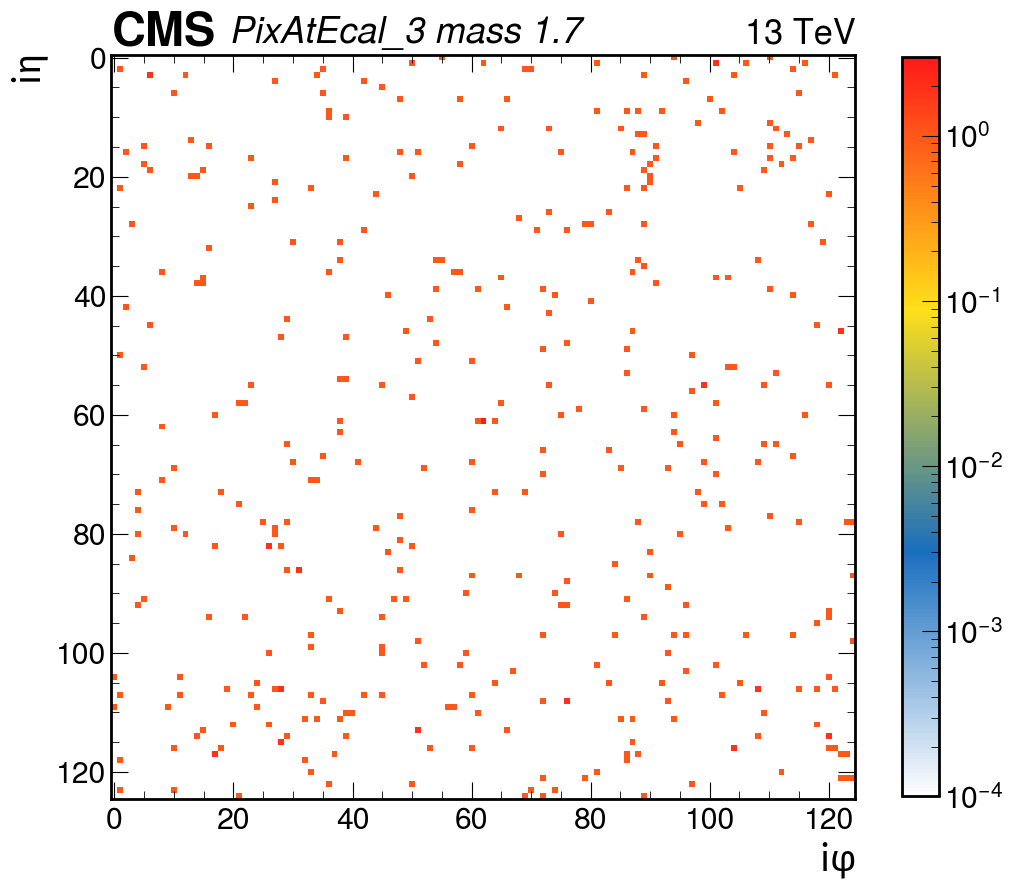

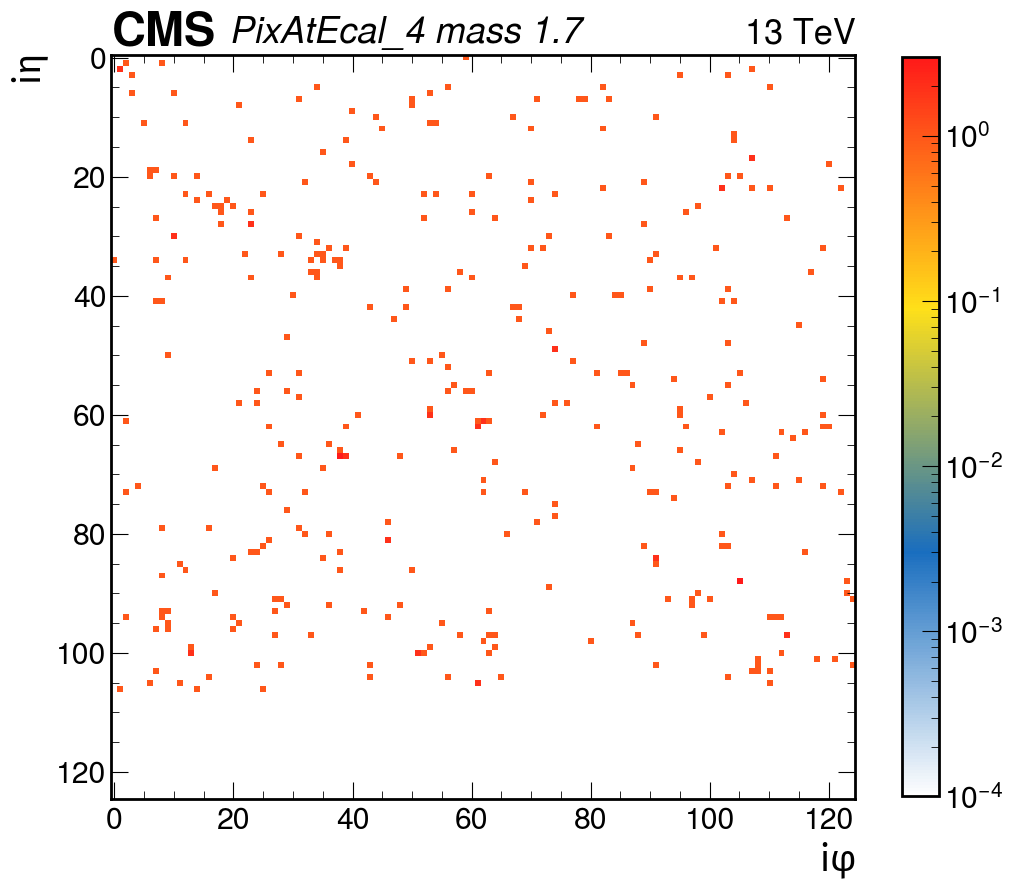

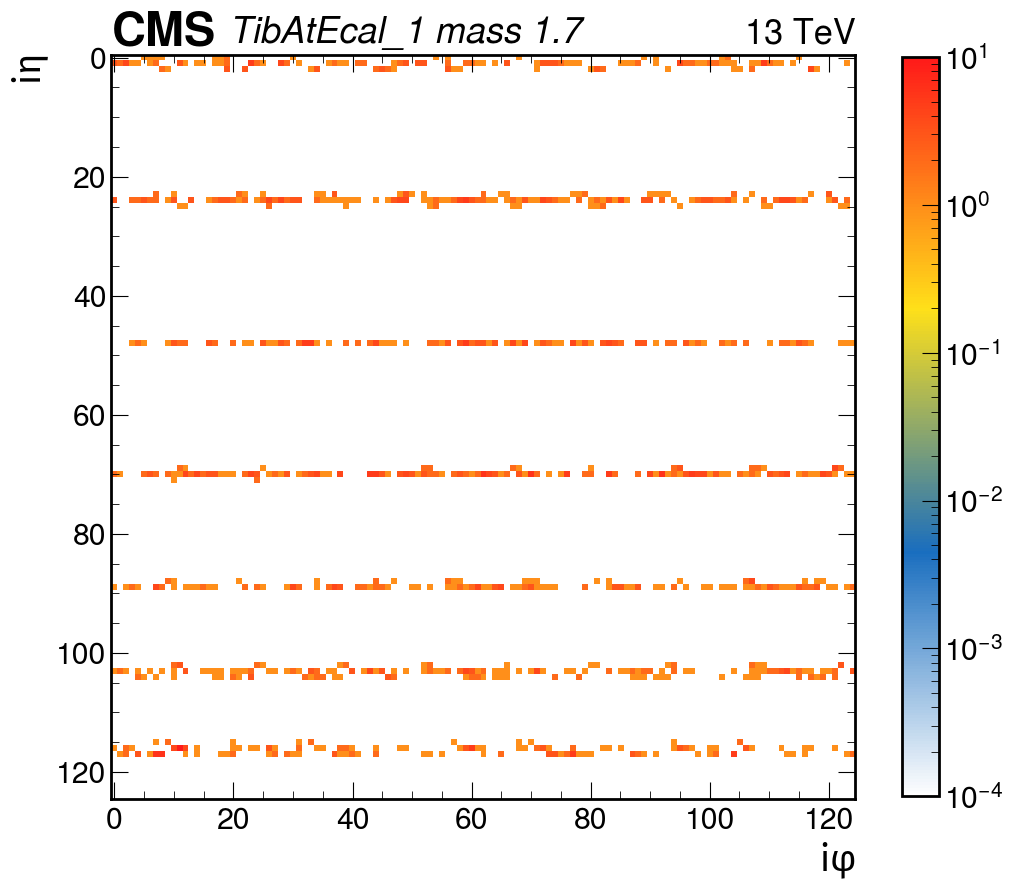

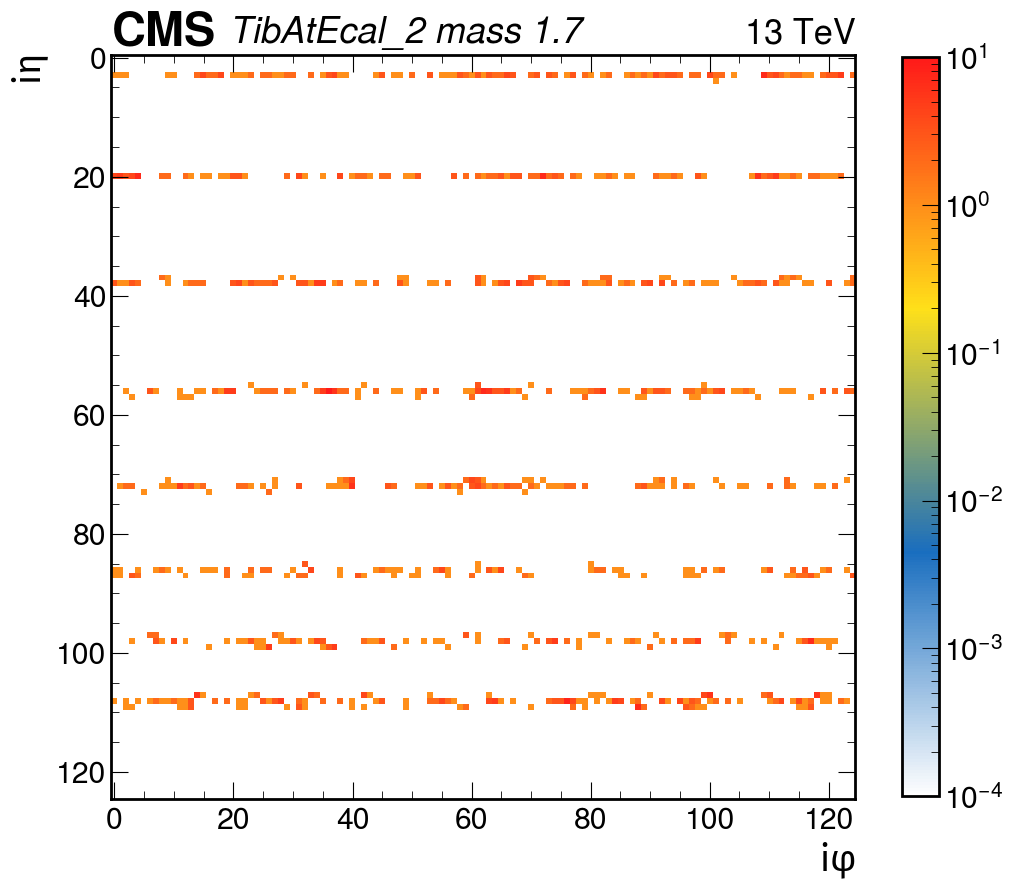

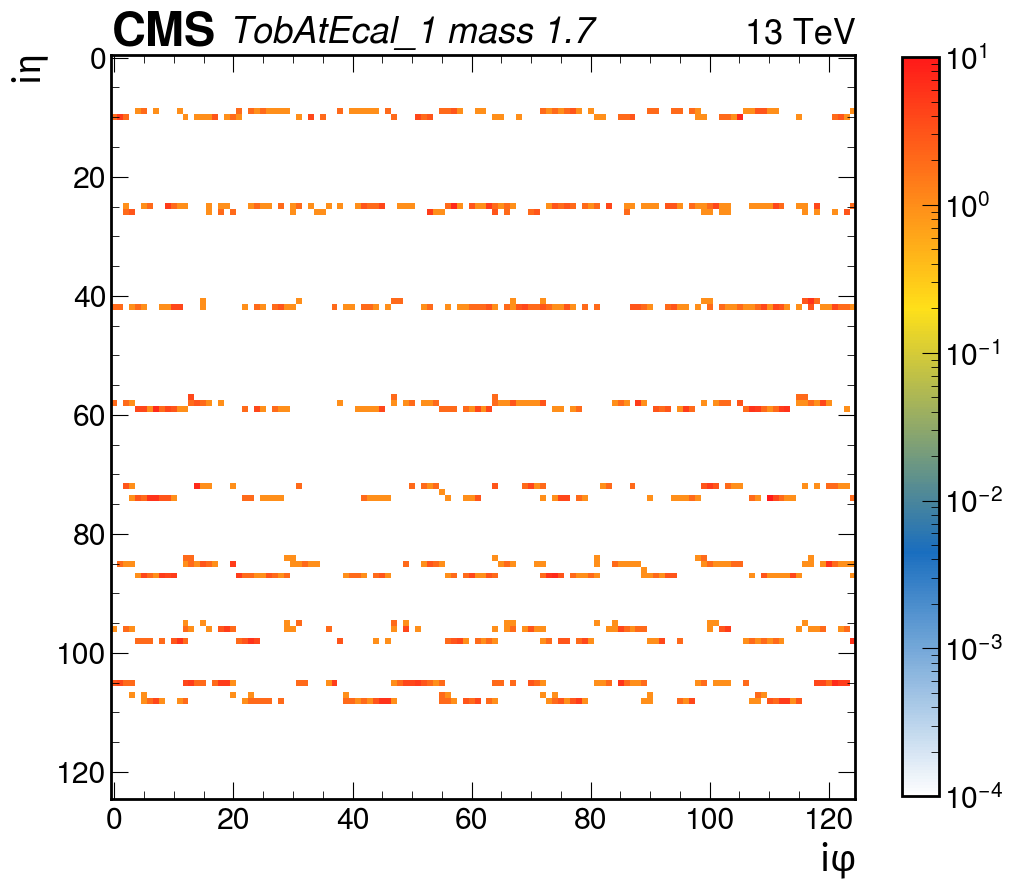

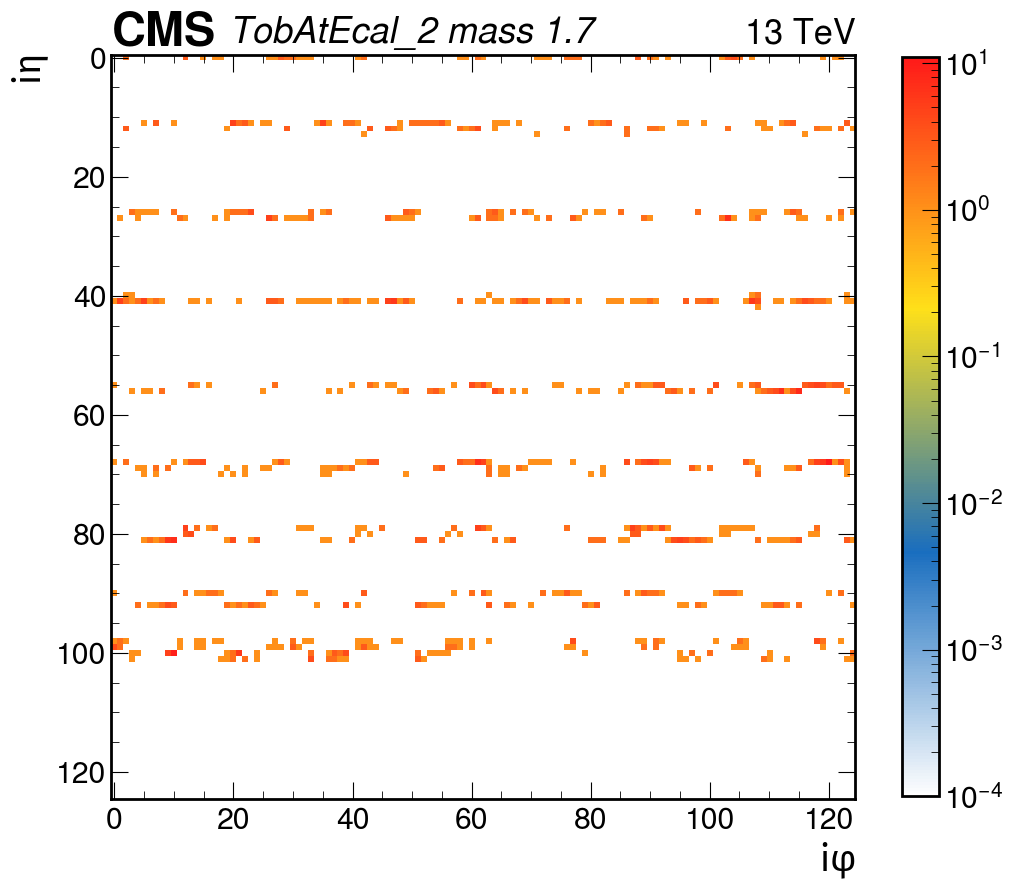

In [59]:
for i, data in enumerate(dset_train):
    if i > 0:
            break
    mass =  np.round(data['am'][0],2)
    for layer in range(13):
        img = data["X_jet"][layer]
        maxs = np.max(img)
        mins = 0.0001
        fig, ax = plt.subplots(figsize=(12,12))
        if maxs  > 0 : plt.imshow(img, cmap=cms_cmap, norm=LogNorm(vmin=mins, vmax=maxs),  alpha=0.9)
        cbar = plt.colorbar(ax=ax, shrink=0.8)
        plt.xlabel(r"$\mathrm{i\varphi}$") #28, 30
        plt.ylabel(r"$\mathrm{i\eta}$") #28
        hep.cms.label(llabel=f" {X_CMSI[layer]} mass {mass}", rlabel="13 TeV", loc=0, ax=ax)
        plt.show()

    

Image combined layers

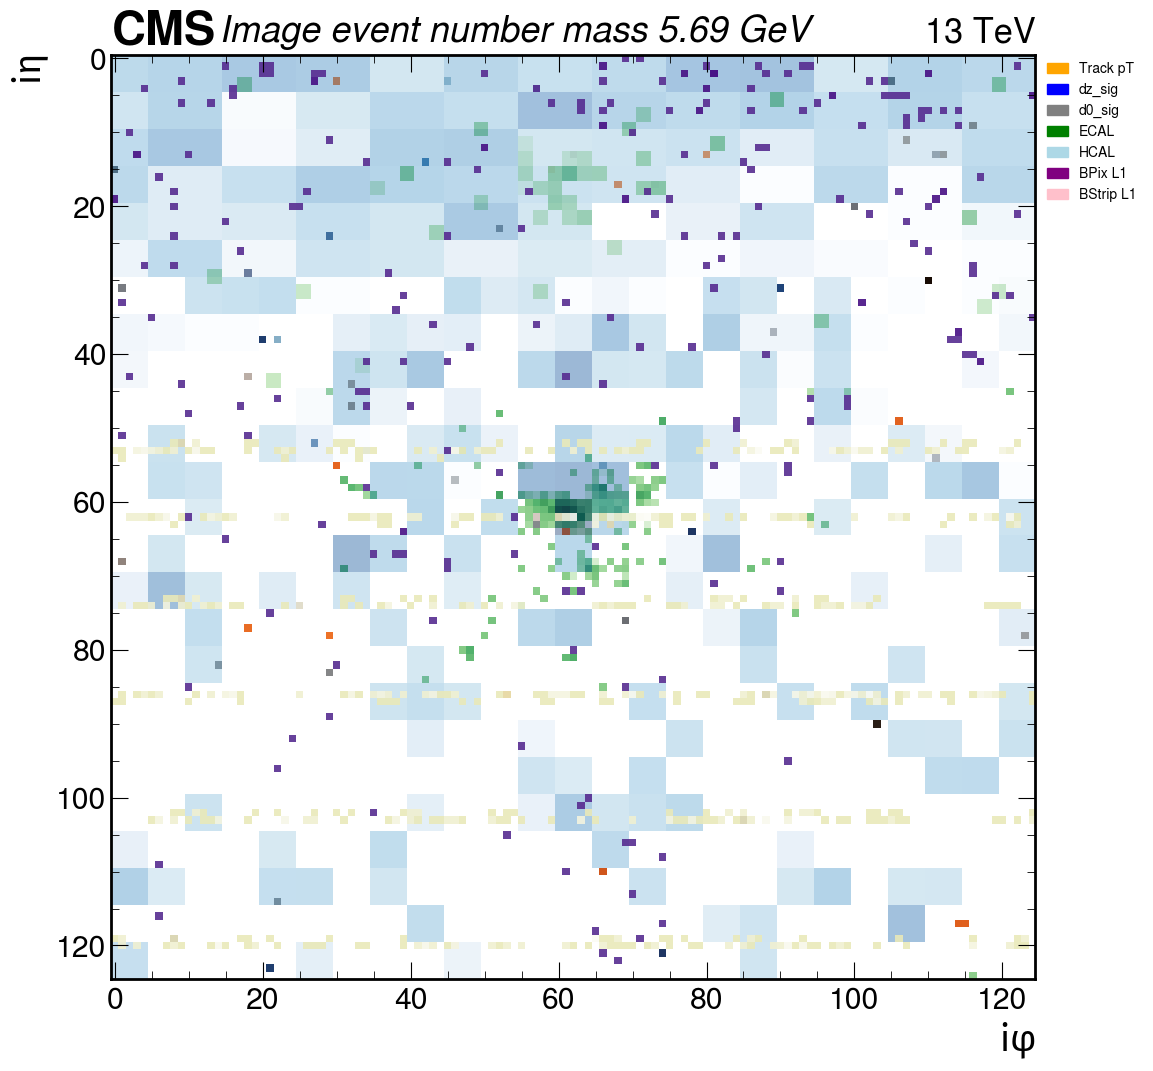

In [41]:
for i, data in enumerate(dset_train):
    mass =  np.round(data['am'][0],2)
    if mass >=5.6 and mass <5.7:
        plotJet_crop(data['X_jet'],mass)

        break